In [1]:
%matplotlib inline
from kid_readout.measurement.io import npy
from kid_readout.measurement import temperature
from kid_readout.analysis.resonator import plot_resonator
from kid_readout.analysis.timeseries import iqnoise

In [2]:
npd110 = npy.NumpyDirectory('/data/detectors/2016-10-18_124841_sweep_stream_on_off/')
npd350 = npy.NumpyDirectory('/data/detectors/2016-10-25_141727_sweep_stream_on_off/')

In [3]:
plot_directory = '/home/flanigan/temp/'

In [4]:
def aac_s21_real_imag(ss):
    return iqnoise.auto_auto_cross(a=ss.s21_raw.real, b=ss.s21_raw.imag, sample_rate=ss.stream_sample_rate)

def coherence(aac):
    return np.abs(aac.S_ab)**2 / (aac.S_aa * aac.S_bb)

def analyze(ss):
    ss.s21_aac = aac_s21_real_imag(ss)
    ss.s21_coherence = coherence(ss.s21_aac)
    return ss

In [25]:
def plot_coherence_on_off(on_ss_list, off_ss_list, xlimits=(1e-1, 2e4), ylimits=(1e-3, 1.5), figsize=(4, 8),
                          num_channels=7, num_attenuations=4):
    fig, axes = plt.subplots(num_channels, num_attenuations, figsize=figsize)
    for channel in range(num_channels):
        for attenuation_index in range(num_attenuations):
            index = channel * num_attenuations + attenuation_index
            ax = axes[channel, attenuation_index]
            off_ss = off_ss_list[index]
            on_ss = on_ss_list[index]
            ax.loglog(off_ss.s21_aac.f, off_ss.s21_coherence, '-', color='black', label='off', alpha=0.5)
            ax.loglog(on_ss.s21_aac.f, on_ss.s21_coherence, '-', color='red', label='on', alpha=0.5)
            ax.set_xlim(*xlimits)
            ax.set_ylim(*ylimits)
            ax.tick_params(labelsize=4)
            if channel != num_channels - 1:
                ax.set_xticklabels([])
            if attenuation_index != 0:
                ax.set_yticklabels([])
    axes[num_channels - 1, 0].set_ylabel('coherence', fontsize=6)
    axes[num_channels - 1, 0].set_xlabel('frequency / Hz', fontsize=6)
    return fig, axes

In [6]:
num_channels = 7
num_attenuations = 4

# 120 mK

In [8]:
sss_110 = [npd110.read(name) for name in npd110.node_names() if name.startswith('SingleSweepStream')]
on_ss_110 = [analyze(sss.stream) for sss in sss_110]
off_ss_110 = [analyze(npd110.read(name)) for name in npd110.node_names() if name.startswith('SingleStream')]

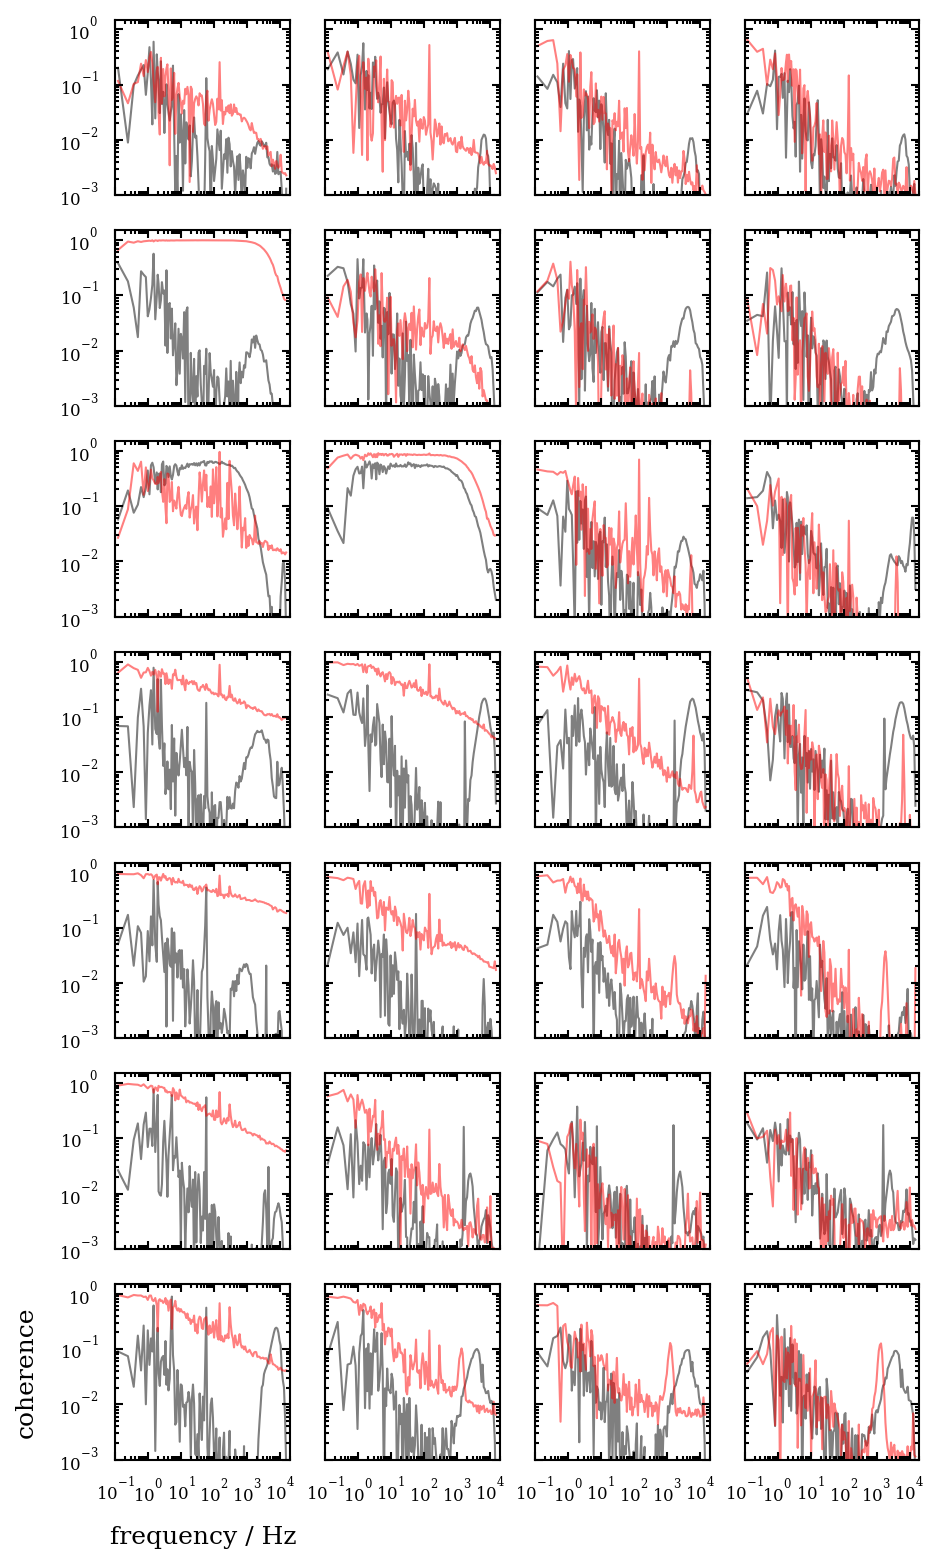

In [26]:
fig, ax = plot_coherence_on_off(on_ss_110, off_ss_110)
#fig.savefig(plot_directory + 'coherence_on_off_all_110_mK.pdf')

# 380 mK

In [10]:
sss_350 = [npd350.read(name) for name in npd350.node_names() if name.startswith('SingleSweepStream')]
on_ss_350 = [analyze(sss.stream) for sss in sss_350]
off_ss_350 = [analyze(npd350.read(name)) for name in npd350.node_names() if name.startswith('SingleStream')]

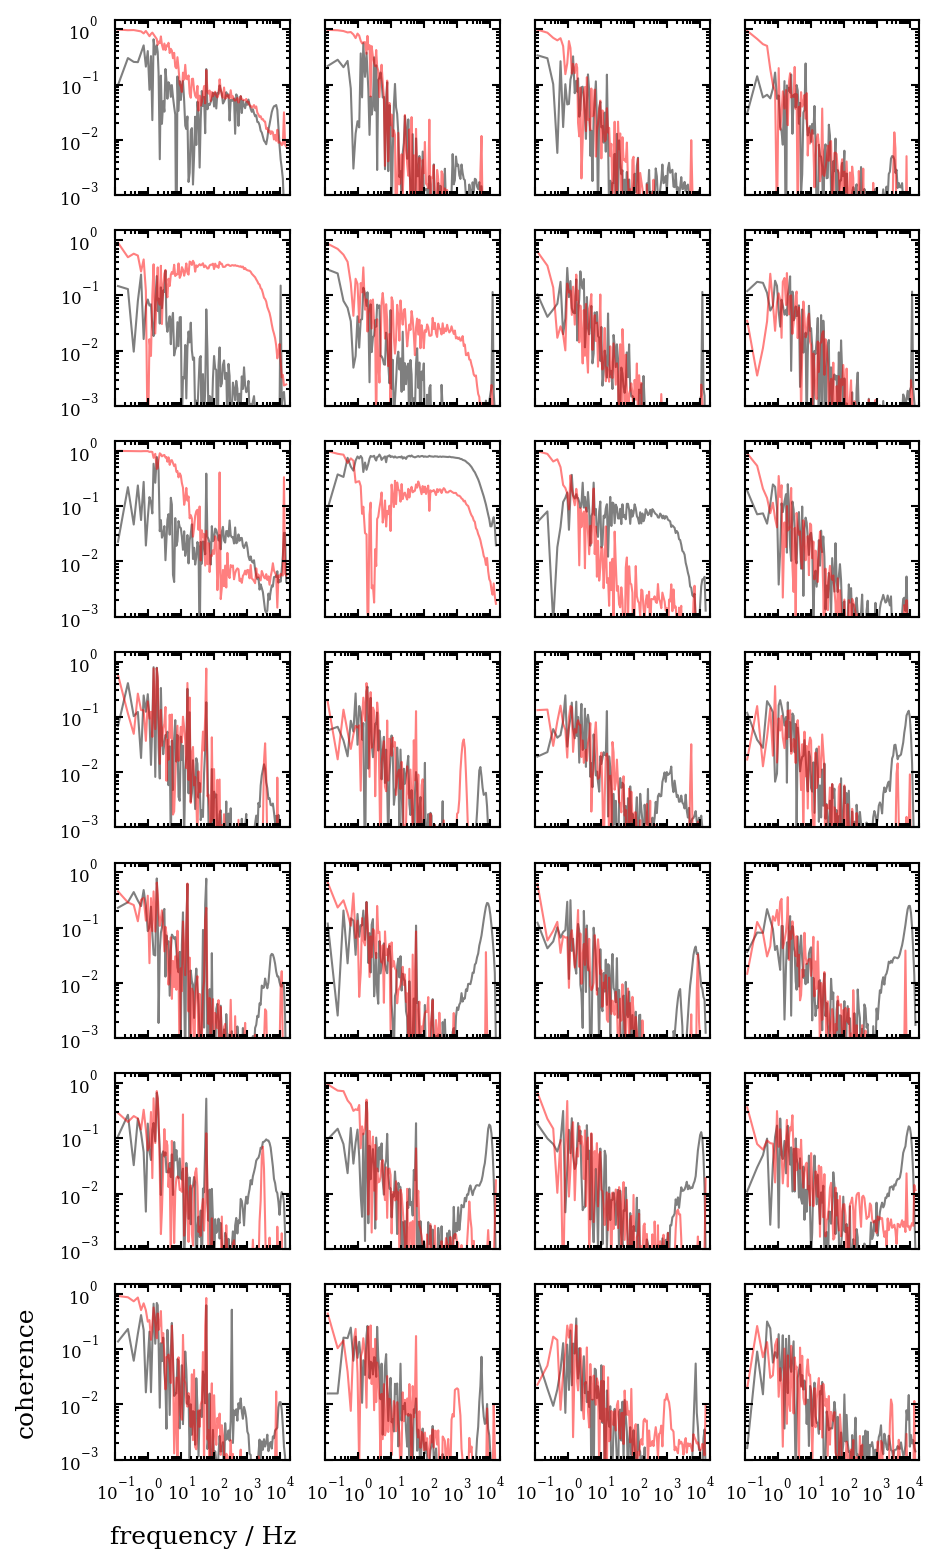

In [27]:
fig, ax = plot_coherence_on_off(on_ss_350, off_ss_350)
#fig.savefig(plot_directory + 'coherence_on_off_all_350_mK.pdf')

# Presentation 2016-11-10

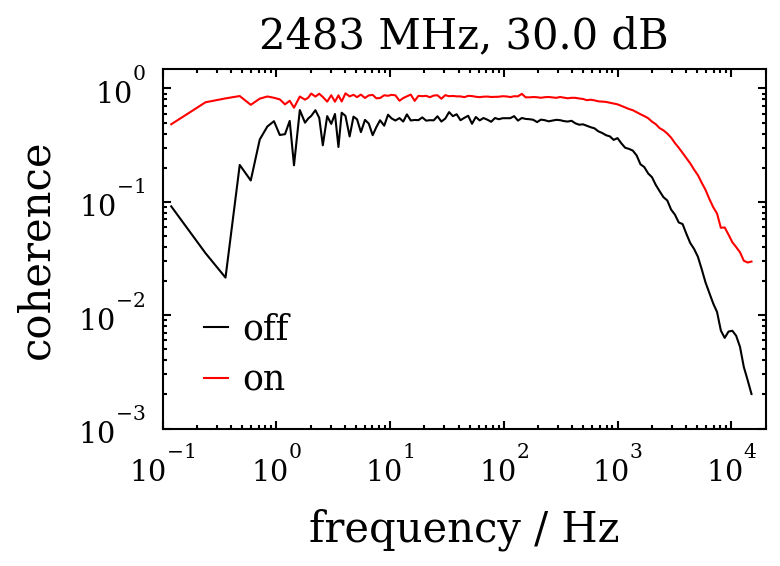

In [37]:
n_proposal = 9
off_ss = off_ss_110[n_proposal]
on_ss = on_ss_110[n_proposal]
fig, ax = plt.subplots()
ax.loglog(off_ss.s21_aac.f, off_ss.s21_coherence, '-', color='black', label='off', alpha=1)
ax.loglog(on_ss.s21_aac.f, on_ss.s21_coherence, '-', color='red', label='on', alpha=1)
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('coherence')
ax.set_xlim(0.1, 2e4)
ax.set_ylim(1e-3, 1.5)
ax.tick_params(labelsize='xx-small')
ax.legend(loc='best')
ax.set_title('{:.0f} MHz, {:.1f} dB'.format(on_ss.frequency_MHz, on_ss.roach_state.dac_attenuation))
fig.savefig(plot_directory + 's21_coherence_proposal_data.pdf')

/SingleSweepStream36


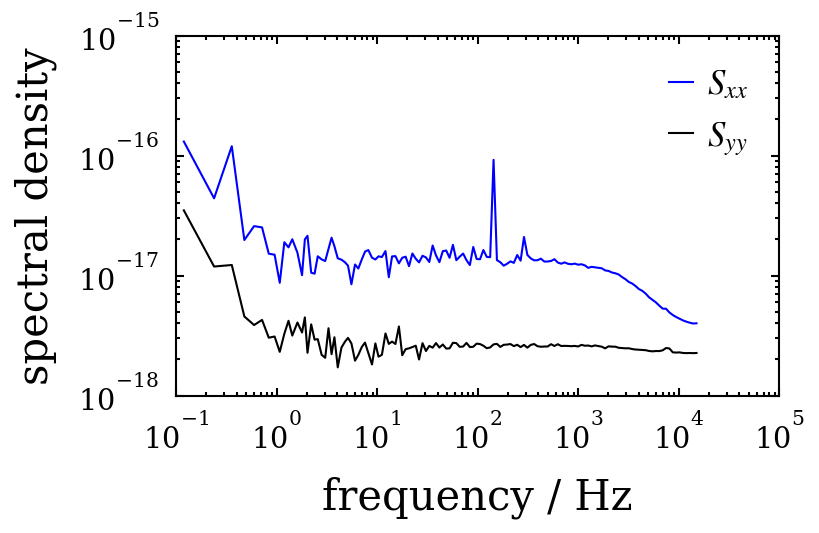

In [45]:
proposal_sss = sss_110[n_proposal]
fig, ax = plt.subplots()
ax.loglog(proposal_sss.S_frequency, proposal_sss.S_xx, 'blue', label='$S_{xx}$')
ax.loglog(proposal_sss.S_frequency, proposal_sss.S_yy, 'black', label='$S_{yy}$')
ax.legend(loc='best')
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density')
fig.savefig(plot_directory + 'Sxx_Syy_proposal.pdf')
print(proposal_sss.io_node_path)

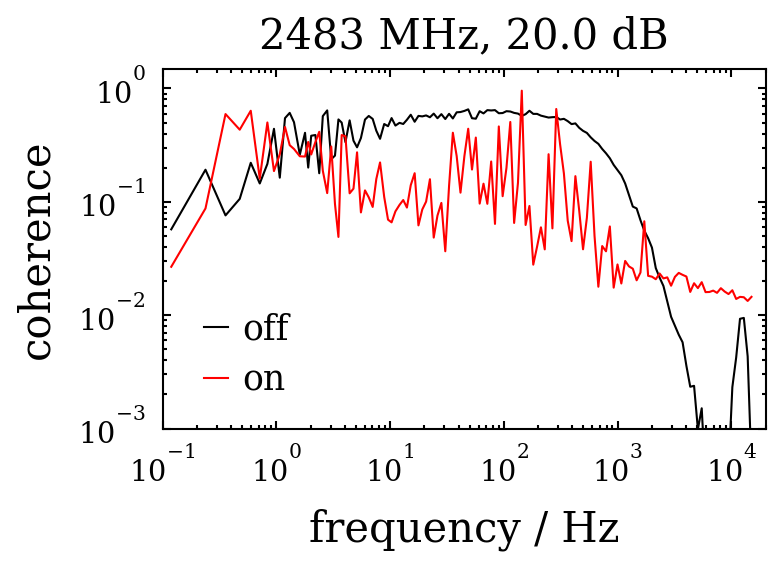

In [38]:
n_off_only = 8
off_ss = off_ss_110[n_off_only]
on_ss = on_ss_110[n_off_only]
fig, ax = plt.subplots()
ax.loglog(off_ss.s21_aac.f, off_ss.s21_coherence, '-', color='black', label='off', alpha=1)
ax.loglog(on_ss.s21_aac.f, on_ss.s21_coherence, '-', color='red', label='on', alpha=1)
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('coherence')
ax.set_xlim(0.1, 2e4)
ax.set_ylim(1e-3, 1.5)
ax.tick_params(labelsize='xx-small')
ax.legend(loc='best')
ax.set_title('{:.0f} MHz, {:.1f} dB'.format(on_ss.frequency_MHz, on_ss.roach_state.dac_attenuation))
fig.savefig(plot_directory + 's21_coherence_signal_only_off.pdf')

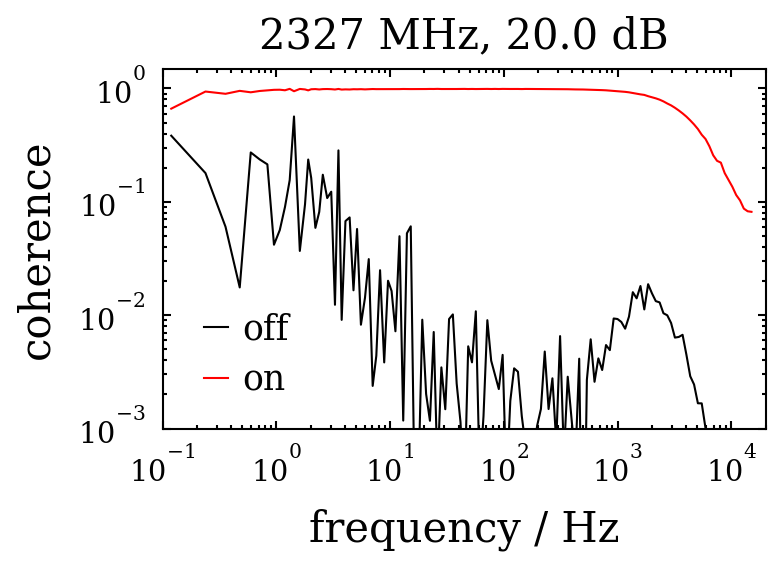

In [39]:
n_on_only = 4
off_ss = off_ss_110[n_on_only]
on_ss = on_ss_110[n_on_only]
fig, ax = plt.subplots()
ax.loglog(off_ss.s21_aac.f, off_ss.s21_coherence, '-', color='black', label='off', alpha=1)
ax.loglog(on_ss.s21_aac.f, on_ss.s21_coherence, '-', color='red', label='on', alpha=1)
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('coherence')
ax.set_xlim(0.1, 2e4)
ax.set_ylim(1e-3, 1.5)
ax.tick_params(labelsize='xx-small')
ax.legend(loc='best')
ax.set_title('{:.0f} MHz, {:.1f} dB'.format(on_ss.frequency_MHz, on_ss.roach_state.dac_attenuation))
fig.savefig(plot_directory + 's21_coherence_signal_only_on.pdf')